# Regularyzacja w modelu regresji - wstęp

In [17]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from scipy import stats
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures 

# Zadanie 1a

Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$.

Zaznacz na wykresie rozproszenia punktów $(x, y)$ funkcję regresji.

**Wskazówka**: `ols('y ~ x + I(x**k)', data_frame)` z `statsmodels.formula.api` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [3]:
n = 50
x = stats.uniform.rvs(size=n, loc=-3, scale=6)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + stats.norm.rvs(size=n, loc=2, scale=2)

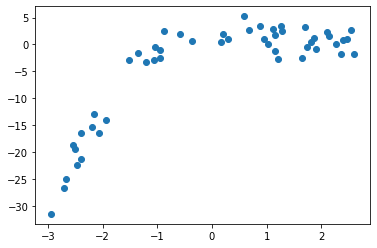

In [4]:
plt.scatter(x, y)

In [6]:
# a)
X = x.reshape(-1, 1)
model1 = LinearRegression(fit_intercept=True)
model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model1_params = [model1.intercept_] + list(model1.coef_)
model1_params

[-4.636086867498542, 4.118900742321859]

In [11]:
print("Wspłczynnik determinacji R2: {}".format(model1.score(X, y)))
print("Współczynniki prostej regresji: {}".format(model1_params))

Wspłczynnik determinacji R2: 0.618002572884913
Współczynniki prostej regresji: [-4.636086867498542, 4.118900742321859]


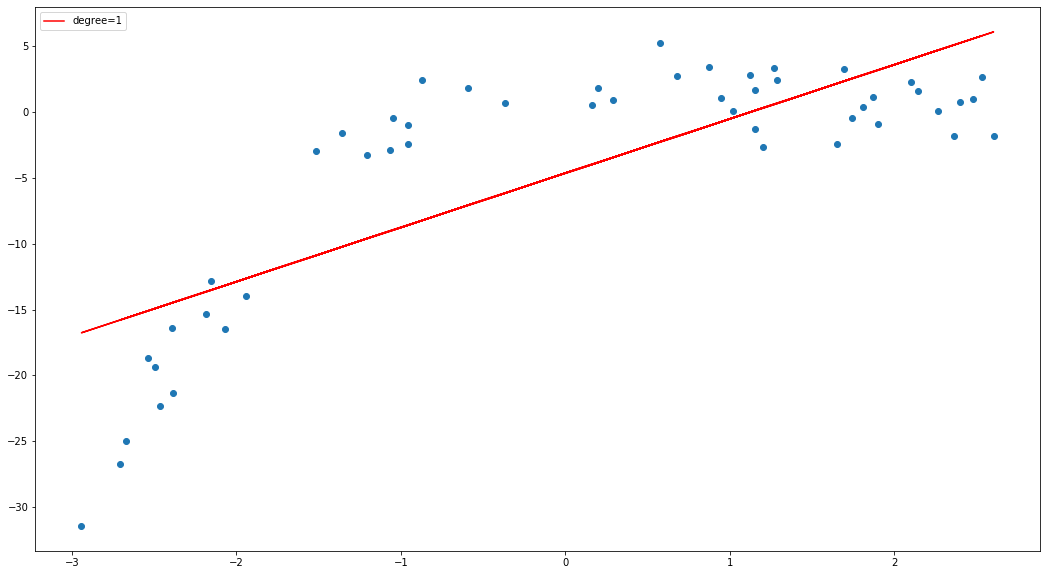

In [24]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
plt.plot(x, x * model1_params[1] + model1_params[0], color='red', label="degree=1")
plt.legend(loc='upper left')
plt.show()

In [23]:
?plt.legend

In [25]:
# b) 

model2 = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

model2.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
model2_params = [model2['linearregression'].intercept_] + list(model2['linearregression'].coef_)
model2_params

[2.1938027956299164, 0.0, 3.5517874198965185, -2.152567525221587]

In [28]:
print("Wspłczynnik determinacji R2: {}".format(model2.score(X, y)))
print("Współczynniki prostej regresji: {}".format(model2_params))

Wspłczynnik determinacji R2: 0.9160084337594142
Współczynniki prostej regresji: [2.1938027956299164, 0.0, 3.5517874198965185, -2.152567525221587]


In [30]:
model2_fittedvalues = model2.predict(X) # y = b0 + b1 * x + b2 * x^2

In [31]:
import operator

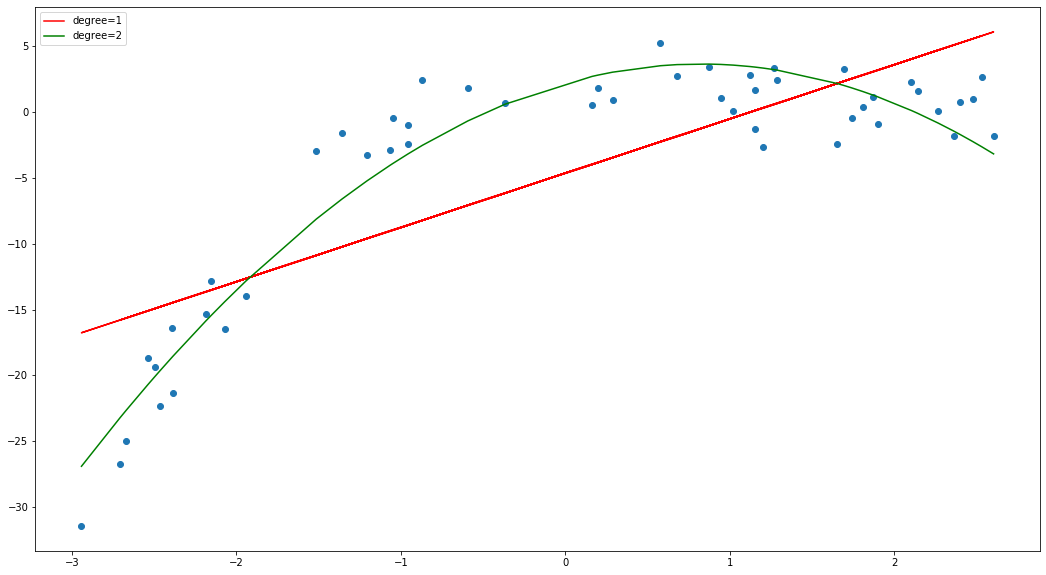

In [36]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
plt.plot(x, x * model1_params[1] + model1_params[0], color='red', label="degree=1")
         
sorted_zip = sorted(zip(x, model2_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='green', label='degree=2')
         
plt.legend(loc='upper left')
plt.show()

In [37]:
# c)
model3 = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

model3.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [40]:
model3_params = [model3['linearregression'].intercept_] + list(model3['linearregression'].coef_)
print("Wspłczynnik determinacji R2: {}".format(model3.score(X, y)))
print("Współczynniki prostej regresji: {}".format(model3_params))

Wspłczynnik determinacji R2: 0.9599217443283199
Współczynniki prostej regresji: [2.2423835545915, 0.0, 0.7726601055905878, -2.0030862479467144, 0.5628150144176755]


In [41]:
model3_fittedvalues = model3.predict(X) # y = b0 + b1 * x + b2 * x^2 + b3 * x^3

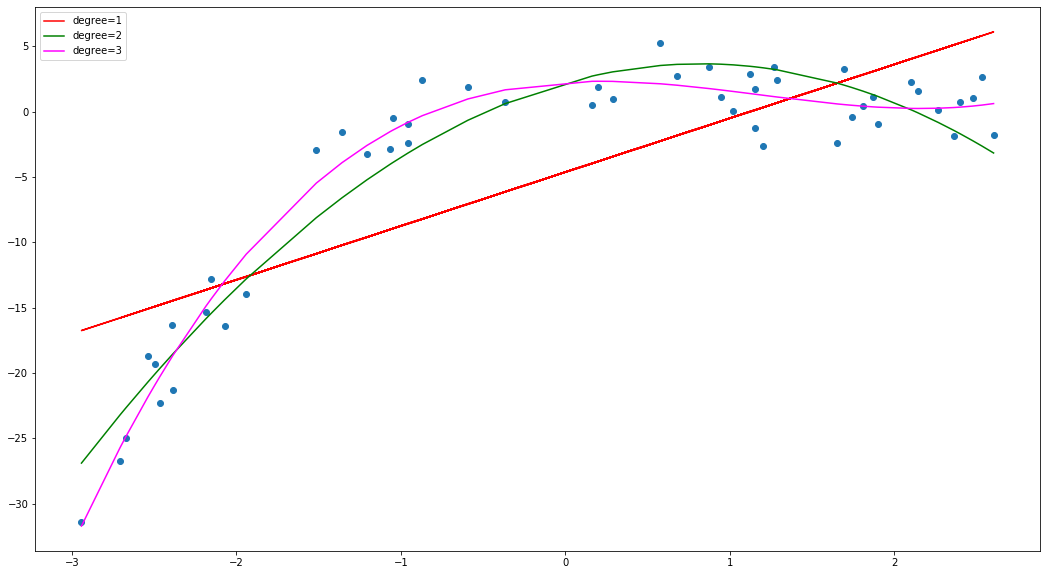

In [43]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
plt.plot(x, x * model1_params[1] + model1_params[0], color='red', label="degree=1")

# -------------------------
         
sorted_zip = sorted(zip(x, model2_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='green', label='degree=2')

# -------------------------

sorted_zip = sorted(zip(x, model3_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='magenta', label='degree=3')

# -------------------------
         
plt.legend(loc='upper left')
plt.show()

In [44]:
model20 = make_pipeline(
    PolynomialFeatures(degree=20),
    LinearRegression()
)

model20.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
model20_params = [model20['linearregression'].intercept_] + list(model20['linearregression'].coef_)
print("Wspłczynnik determinacji R2: {}".format(model20.score(X, y)))
print("Współczynniki prostej regresji: {}".format(model20_params))

Wspłczynnik determinacji R2: 0.9759277954213598
Współczynniki prostej regresji: [-1.4573327141079835, 0.0, 6.373211023329147, 36.03702936542659, -25.64675165755616, -87.49963110104699, 44.85179636940546, 82.13916164405474, -38.05261759929117, -35.39555531492679, 17.73459631185213, 5.505155218157276, -4.77950303680766, 0.9582102385266572, 0.7570065102845244, -0.5413194306662027, -0.06883524945929884, 0.09164179559890255, 0.003297949880652437, -0.007134643547765366, -6.459577669851007e-05, 0.00021589479559053996]


In [46]:
model20_fittedvalues = model20.predict(X) # y = b0 + b1 * x + b2 * x^2 + b3 * x^3 + ... + b20 * x^20

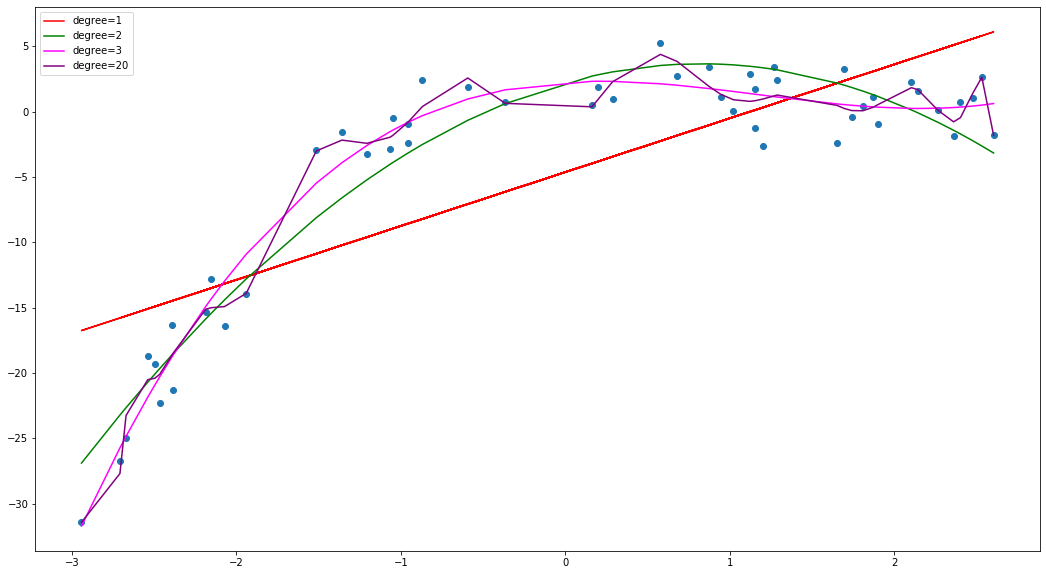

In [47]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
plt.plot(x, x * model1_params[1] + model1_params[0], color='red', label="degree=1")

# -------------------------
         
sorted_zip = sorted(zip(x, model2_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='green', label='degree=2')

# -------------------------

sorted_zip = sorted(zip(x, model3_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='magenta', label='degree=3')

# -------------------------

sorted_zip = sorted(zip(x, model20_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='purple', label='degree=20')

# -------------------------
         
plt.legend(loc='upper left')
plt.show()

# Zadanie 1b

Dla wygenerowanej pary punktów dopasuj model regresji:

a) wielomianowej stopnia 20 z regularyzacją grzbietową (Ridge) z parametrem $\alpha = 0.1$,

b) wielomianowej stopnia 20 z regularyzacją Lasso z parametrem $\alpha = 0.1$.

Powtórz podpunkt a) i b) dla różnych wartości parametru $\alpha$, np. $\alpha \in \{0.001, 0.005, 0.01, 0.5, 1, 5\}$.

In [49]:
# Sposob 1:

# Krok 1
polynomial_features20 = PolynomialFeatures(degree=20)
X20 = polynomial_features20.fit_transform(X)
X20.shape

(50, 21)

In [52]:
pd.DataFrame(X20).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.122868,1.260833,1.415750,1.589701,1.785025,2.004348,2.250619,2.527149,2.837656,...,3.577811,4.017411,4.511024,5.065287,5.687650,6.386483e+00,7.171180e+00,8.052291e+00,9.041663e+00,1.015260e+01
1,1.0,-1.065513,1.135317,-1.209694,1.288945,-1.373387,1.463361,-1.559229,1.661378,-1.770219,...,-2.009760,2.141424,-2.281714,2.431195,-2.590469,2.760177e+00,-2.941003e+00,3.133675e+00,-3.338970e+00,3.557715e+00
2,1.0,1.742656,3.036851,5.292188,9.222464,16.071586,28.007251,48.807014,85.053851,148.219632,...,450.120949,784.406121,1366.950290,2382.124574,4151.224464,7.234158e+03,1.260665e+04,2.196906e+04,3.828452e+04,6.671676e+04
3,1.0,2.362484,5.581330,13.185803,31.151246,73.594318,173.865392,410.754189,970.400157,2292.554746,...,12795.504972,30229.174471,71415.937954,168719.003514,398595.929179,9.416765e+05,2.224695e+06,5.255807e+06,1.241676e+07,2.933440e+07
4,1.0,-2.496197,6.230997,-15.553794,38.825328,-96.915652,241.920520,-603.881174,1507.406124,-3762.782018,...,-23445.884905,58525.537796,-146091.247491,364672.472855,-910294.180809,2.272273e+06,-5.672041e+06,1.415853e+07,-3.534247e+07,8.822175e+07


In [53]:
# Krok 2 - wystandaryzować zmienne X
?StandardScaler #     z = (x - u) / s

In [55]:
standard_scaler = StandardScaler()
X20_scale = standard_scaler.fit_transform(X20)
X20_scale

array([[ 0.        ,  0.60235953, -0.78874658, ..., -0.26487348,
         0.17981286, -0.23852496],
       [ 0.        , -0.62943566, -0.84090223, ..., -0.26487361,
         0.17981276, -0.23852498],
       [ 0.        ,  0.95122557, -0.05076121, ..., -0.26431726,
         0.18013953, -0.23832768],
       ...,
       [ 0.        ,  0.4618461 , -0.99580163, ..., -0.26487369,
         0.17981279, -0.23852499],
       [ 0.        ,  0.69603638, -0.62193605, ..., -0.26487123,
         0.17981385, -0.23852451],
       [ 0.        ,  0.64853657, -0.70939569, ..., -0.26487296,
         0.17981308, -0.23852487]])

In [56]:
?Ridge

In [96]:
ridge01 = Ridge(alpha=0.1)

In [97]:
ridge01.fit(X=X20_scale, y=y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
print("R2: {}".format(ridge01.score(X20_scale, y)))

R2: 0.9612517074408606


In [99]:
model_ridge_fittedvalues = ridge01.predict(X20_scale)

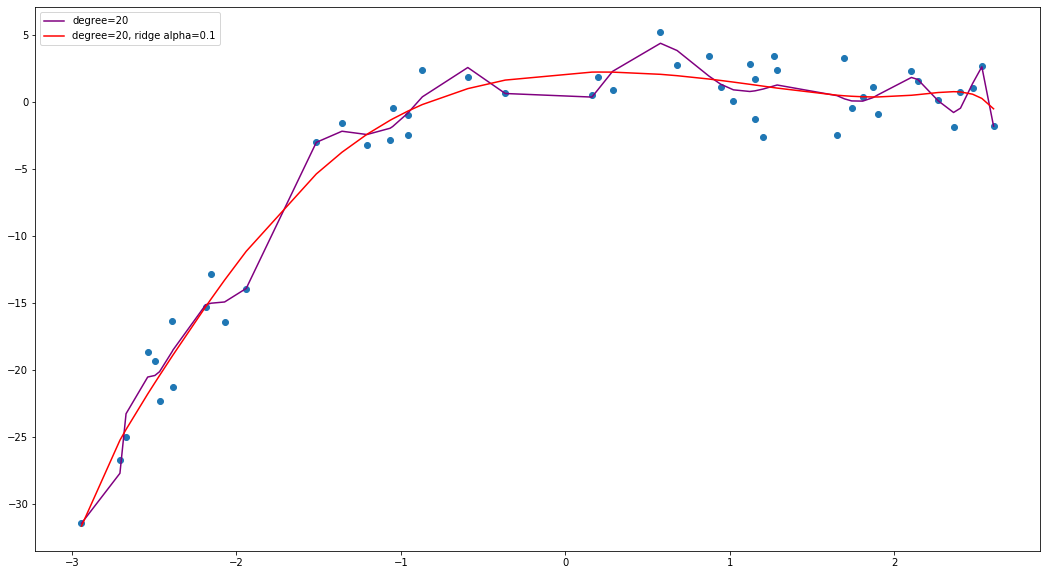

In [100]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
#  -------------------------

sorted_zip = sorted(zip(x, model20_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='purple', label='degree=20')

#  -------------------------

sorted_zip = sorted(zip(x, model_ridge_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='red', label='degree=20, ridge alpha=0.1')

# -------------------------
         
plt.legend(loc='upper left')
plt.show()

In [94]:
# pipelines

piplines_ridge = make_pipeline(
    PolynomialFeatures(degree=20),
    StandardScaler(),
    Ridge(alpha=0.1)
)

piplines_ridge.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [95]:
piplines_ridge.score(X, y)

0.9612517074408606

In [101]:
?Lasso

In [102]:
# b)

pipelines_lasso = make_pipeline(
    PolynomialFeatures(degree=20),
    StandardScaler(),
    Lasso(alpha=0.1, max_iter=10e5)
)

pipelines_lasso.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [103]:
model_lasso_fittedvalues = pipelines_lasso.predict(X)

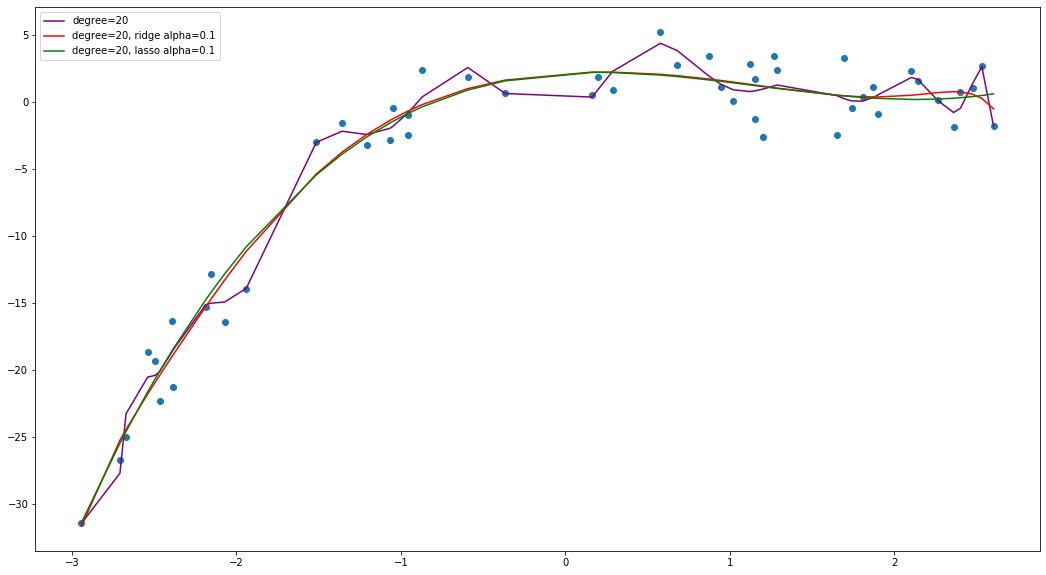

In [105]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
#  -------------------------

sorted_zip = sorted(zip(x, model20_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='purple', label='degree=20')

#  -------------------------

sorted_zip = sorted(zip(x, model_ridge_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='red', label='degree=20, ridge alpha=0.1')

#  -------------------------

sorted_zip = sorted(zip(x, model_lasso_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='green', label='degree=20, lasso alpha=0.1')

# -------------------------
         
plt.legend(loc='upper left')
plt.show()

# Zadanie 2

Narysuj wykres funkcji 
$$y = cos(x) + \epsilon$$
dla $x \in [\pi, \frac{2}{3}\pi]$ oraz $\epsilon \in N(0, 0.25)$.

Dopasuj model regresji:
- liniowej
- wielomianej stopnia 2, 10 i 20,
- wielomianej stopnia 20 z regularyzacja Ridge z parametrem $\alpha\in\{0.001, 0.01, 0.1, 1, 2\}$.
- wielomianej stopnia 20 z regularyzacją Lasso z parametrem $\alpha\in\{0.001, 0.01, 0.1, 1, 2\}$.

**Wskazówka**: Napisz funkcję, która dla dowolnego zbioru dopasuje odpowiedni model.

In [ ]:
def fun(model, degree, is_regularization = False):
    if (is_linear)
    make_pipeline(
        PolynomialFeatures(degee=degree),
        model
    )
    else:
        make_pipeline(
        PolynomialFeatures(),
        StandardScaler(),
        model
        )